**Naive Bayes Classifier**

**(Code: Subhajit Das)**

**What is Naive Bayes Classifier:**

The Naive Bayes Classifier is a supervised machine learning algorithm used for classification tasks1. It’s part of a family of generative learning algorithms, which means it seeks to model the distribution of inputs of a given class or category.

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. They are not a single algorithm but a family of algorithms where all of them share a common principle: every pair of features being classified is independent of each other. This means that the algorithm assumes that no pair of features are dependent, and each feature contributes equally to the outcome.

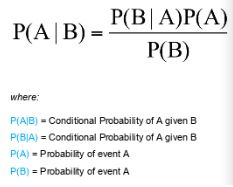

**Where we can use Naive Bayes Classifier:**

The Naive Bayes classifier can be used in a variety of applications, including:

1. **Spam Filtering**: It's commonly used in email services to determine whether an email is spam or not.
2. **Text Classification**: It can be used to categorize documents into different categories.
3. **Sentiment Analysis**: It's used to analyze the sentiment of a given text, such as determining whether a movie review is positive or negative.
4. **Recommender Systems**: It can be used to recommend products or services to users based on their past behavior.
5. **Credit Scoring**: It's used in the finance industry to determine the creditworthiness of a customer.
6. **Medical Data Classification**: It's used in the healthcare industry to classify patient data into different categories for better diagnosis and treatment.

**How Naive Bayes Classifier works:**

The Naive Bayes classifier works based on the principles of probability theory and Bayes' Theorem. Here's a step-by-step explanation of how it works:

1. **Feature Independence**: The fundamental assumption of Naive Bayes is that each feature makes an independent and equal contribution to the outcome. This means that the algorithm assumes that no pair of features are dependent.

2. **Dataset Division**: The dataset is divided into a feature matrix and a response vector. The feature matrix contains all the vectors (rows) of the dataset, where each vector consists of the value of dependent features. The response vector contains the value of the class variable (prediction or output) for each row of the feature matrix.

3. **Application of Bayes' Theorem**: Bayes' Theorem is used to find the probability of an event occurring given the probability of another event that has already occurred. In the context of Naive Bayes, we are trying to find the probability of a class (or tag), given the features of the data.

4. **Prediction**: The Naive Bayes classifier operates by returning the class which has the maximum posterior probability out of a group of classes.

Despite its simplicity and the 'naive' assumption of feature independence, the Naive Bayes classifier often performs well and is widely used in various applications.

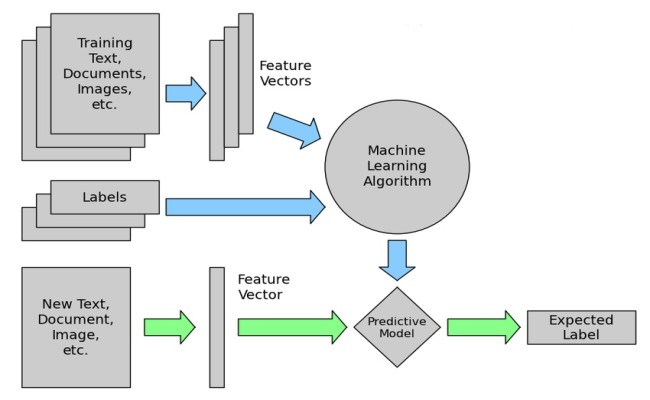

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ads_df = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/8_Social_Network_Ads.csv")
ads_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
ads_df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

**Separating features and labels**

In [4]:
x = ads_df.iloc[:, [1,2,3]].values # '.values' for Numpy representation of the DataFrame
x

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [5]:
y = ads_df.iloc[:, 4].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

**Using LabelEncoder for Gender column**

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
Le = LabelEncoder()

In [8]:
x[:,0] = Le.fit_transform(x[:,0])

In [9]:
x # Gender converted through Label Encoder

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

**Analysis**

In [10]:
print(ads_df['Gender'].value_counts()) # Total gender of Male and Female

Female    204
Male      196
Name: Gender, dtype: int64


In [11]:
print(ads_df['Purchased'].value_counts()) # Total purchased and not purchased

0    257
1    143
Name: Purchased, dtype: int64


In [12]:
print(ads_df.groupby('Gender')['Purchased'].value_counts()) # Purchasing by number of male and female

Gender  Purchased
Female  0            127
        1             77
Male    0            130
        1             66
Name: Purchased, dtype: int64


**Spliting train and test datasets**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
# length or sample of train dataset
len(x_train)

320

In [16]:
# length or sample of test dataset
len(x_test)

80

**Using Naive Bayes Classifier**

**Parameters used in GaussianNB():**

The GaussianNB in sklearn has the following parameters:

1. **priors:** Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.
2. **var_smoothing:** Portion of the largest variance of all features that is added to variances for calculation stability.

These parameters allow you to control the behavior of the Gaussian Naive Bayes classifier and can be tuned to improve the performance of the model on your specific task. For example, you can tune the ‘var_smoothing’ parameter

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
naive = GaussianNB()

In [19]:
naive.fit(x_train, y_train)

GaussianNB()

In [20]:
naive.predict(x_test) # 1: purchased, 0: not purchased

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [21]:
x_test[:5]# 1: male, 0: Female

array([[0, 48, 119000],
       [0, 32, 117000],
       [1, 40, 61000],
       [0, 48, 96000],
       [0, 30, 116000]], dtype=object)

In [22]:
y_test[:5]

array([1, 1, 0, 1, 0])

**Viewing the prediction score**

In [23]:
naive.score(x_test, y_test)

0.8875

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
pred_naive = naive.predict(x_test) # storing the predictions that your model made on the x_test data.

In [26]:
# Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets, so we have to use pred_naive
confusion_matrix(y_test, pred_naive)

array([[47,  4],
       [ 5, 24]])

In [27]:
print(accuracy_score(y_test, pred_naive))

0.8875


In [28]:
print(classification_report(y_test, pred_naive))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        51
           1       0.86      0.83      0.84        29

    accuracy                           0.89        80
   macro avg       0.88      0.87      0.88        80
weighted avg       0.89      0.89      0.89        80



**Predict purchased with user input**

In [29]:
enc_gender = LabelEncoder()
categories = ['Male', 'Female']
enc_gender.fit(categories)

LabelEncoder()

In [30]:
purchased_le = LabelEncoder()
categories = ['yes' 'no']
purchased_le.fit(categories)

LabelEncoder()

In [31]:
gender = input("Enter the Gender: ") # 0: 'Female', 1: 'male'
gender_var = enc_gender.transform([gender])[0] # The [0] at the end is an indexing operation that gets the first element from the output of the transform method

age = int(input("Enter the Age: "))

estimatedsalary = int(input("Enter the Estimated Salary: "))

label_map = {0: 'no', 1: 'yes'}
predict_value = naive.predict([[gender_var, age, estimatedsalary]])

# Map the numerical prediction back to a string label
label_value = label_map[predict_value[0]]

print(label_value) # 0: 'no', 1: 'yes'

Enter the Gender: Male
Enter the Age: 21
Enter the Estimated Salary: 18000
no


**Plotting on actual vs predicted data**

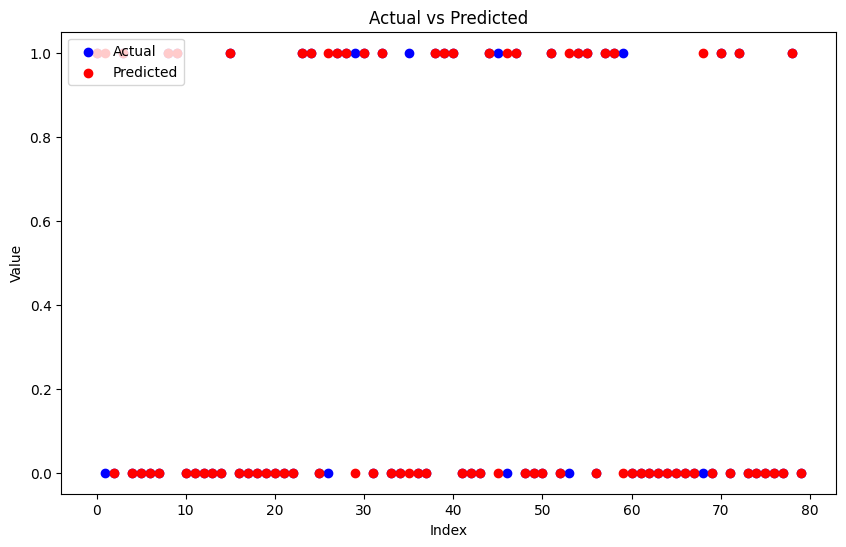

In [32]:
import matplotlib.pyplot as plt

# Assuming y_actual and y_predicted are your data
y_actual = naive.predict(x_test)
y_predicted = y_test

plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.scatter(range(len(y_actual)), y_actual, color='blue', label='Actual')

# Plotting the predicted values
plt.scatter(range(len(y_predicted)), y_predicted, color='red', label='Predicted')

plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()